## 第71讲 使用CNN Keras建立模型进行图像识别


## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

In [63]:
#https://www.kaggle.com/c/dogs-vs-cats/data

In [74]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [75]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import cv2

In [76]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

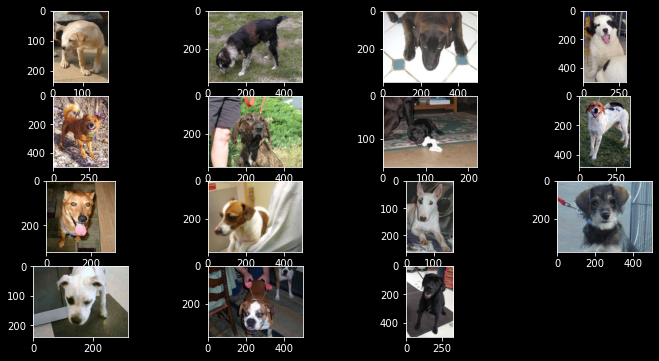

In [77]:
plt.figure(figsize = (12,6))
for i in range(1, 16, 1):
    img = cv2.imread('D:/python/Project0-Python-MachineLearning/Lesson69/train/dogs/dog.'+str(i)+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB ) 
    plt.subplot(4,4,i)
    plt.imshow(img)
plt.show()  

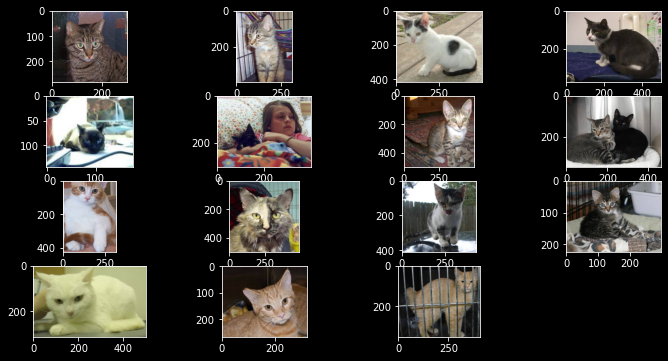

In [78]:
plt.figure(figsize = (12,6))
for i in range(1, 16, 1):
    img = cv2.imread('D:/python/Project0-Python-MachineLearning/Lesson69/train/cats/cat.'+str(i)+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB ) 
    plt.subplot(4,4,i)
    plt.imshow(img)
plt.show()  

In [79]:
model = Sequential()
model.add(Convolution2D(32 , 3, 3,  input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size  = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [80]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [95]:
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

train_set = train_datagen.flow_from_directory('D:/python/Project0-Python-MachineLearning/Lesson69/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



test_set = test_datagen.flow_from_directory('D:/python/Project0-Python-MachineLearning/Lesson69/test1/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 7736 images belonging to 2 classes.
Found 4562 images belonging to 2 classes.


In [96]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [97]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

In [98]:
len(train_set)

242

In [99]:
len(test_set)

143

In [100]:
model.fit_generator(train_set,
                         steps_per_epoch = len(train_set),
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = len(test_set))

242/242 [==============================] - 61s 253ms/step - loss: 0.6669 - accuracy: 0.5842 - val_loss: 0.5833 - val_accuracy: 0.7041


In [101]:
#from tensorflow.keras.models import load_model

#model.save('cat_dog.h5')

In [102]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
#model = load_model( 'cat_dog.h5')

In [104]:
img = image.load_img('D:/python/Project0-Python-MachineLearning/Lesson69/test1/cats/9.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

print(classes)

[[1.]]


In [105]:
model.predict(img_data)

array([[1.]], dtype=float32)

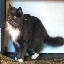

In [106]:
img

In [107]:
img1 = image.load_img('D:/python/Project0-Python-MachineLearning/Lesson69/test1/dogs/2.jpg',target_size=(64,64))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1,axis=0)
img_data1 = preprocess_input(x1)
classes = model.predict(img_data1)

print(classes)

[[1.]]


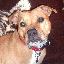

In [108]:
img1